In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Sepsis_Dataset.csv",sep=",")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [3]:
df.head(5)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [4]:
from matplotlib import pyplot as plt

In [5]:
df.isnull().sum()

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

In [6]:
df.nunique()

Unnamed: 0            336
Hour                  336
HR                    343
O2Sat                 145
Temp                  641
SBP                   990
MAP                   945
DBP                   678
Resp                  235
EtCO2                 139
BaseExcess            407
HCO3                  304
FiO2                  104
pH                    103
PaCO2                 551
SaO2                  432
AST                  2025
BUN                   265
Alkalinephos          752
Calcium               549
Chloride              108
Creatinine           1407
Bilirubin_direct      280
Glucose              1157
Lactate              1340
Magnesium             110
Phosphate             193
Potassium             402
Bilirubin_total       407
TroponinI            2423
Hct                   725
Hgb                   340
PTT                  1410
WBC                   891
Fibrinogen            823
Platelets             989
Age                  5987
Gender                  2
Unit1       

In [7]:
#total no of patients in the dataset
patients=list(df['Patient_ID'].unique())
len(patients)

40336

In [8]:
df['Unit']=df['Unit1'].add (df['Unit2'], fill_value=0)
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NaN


<Axes: >

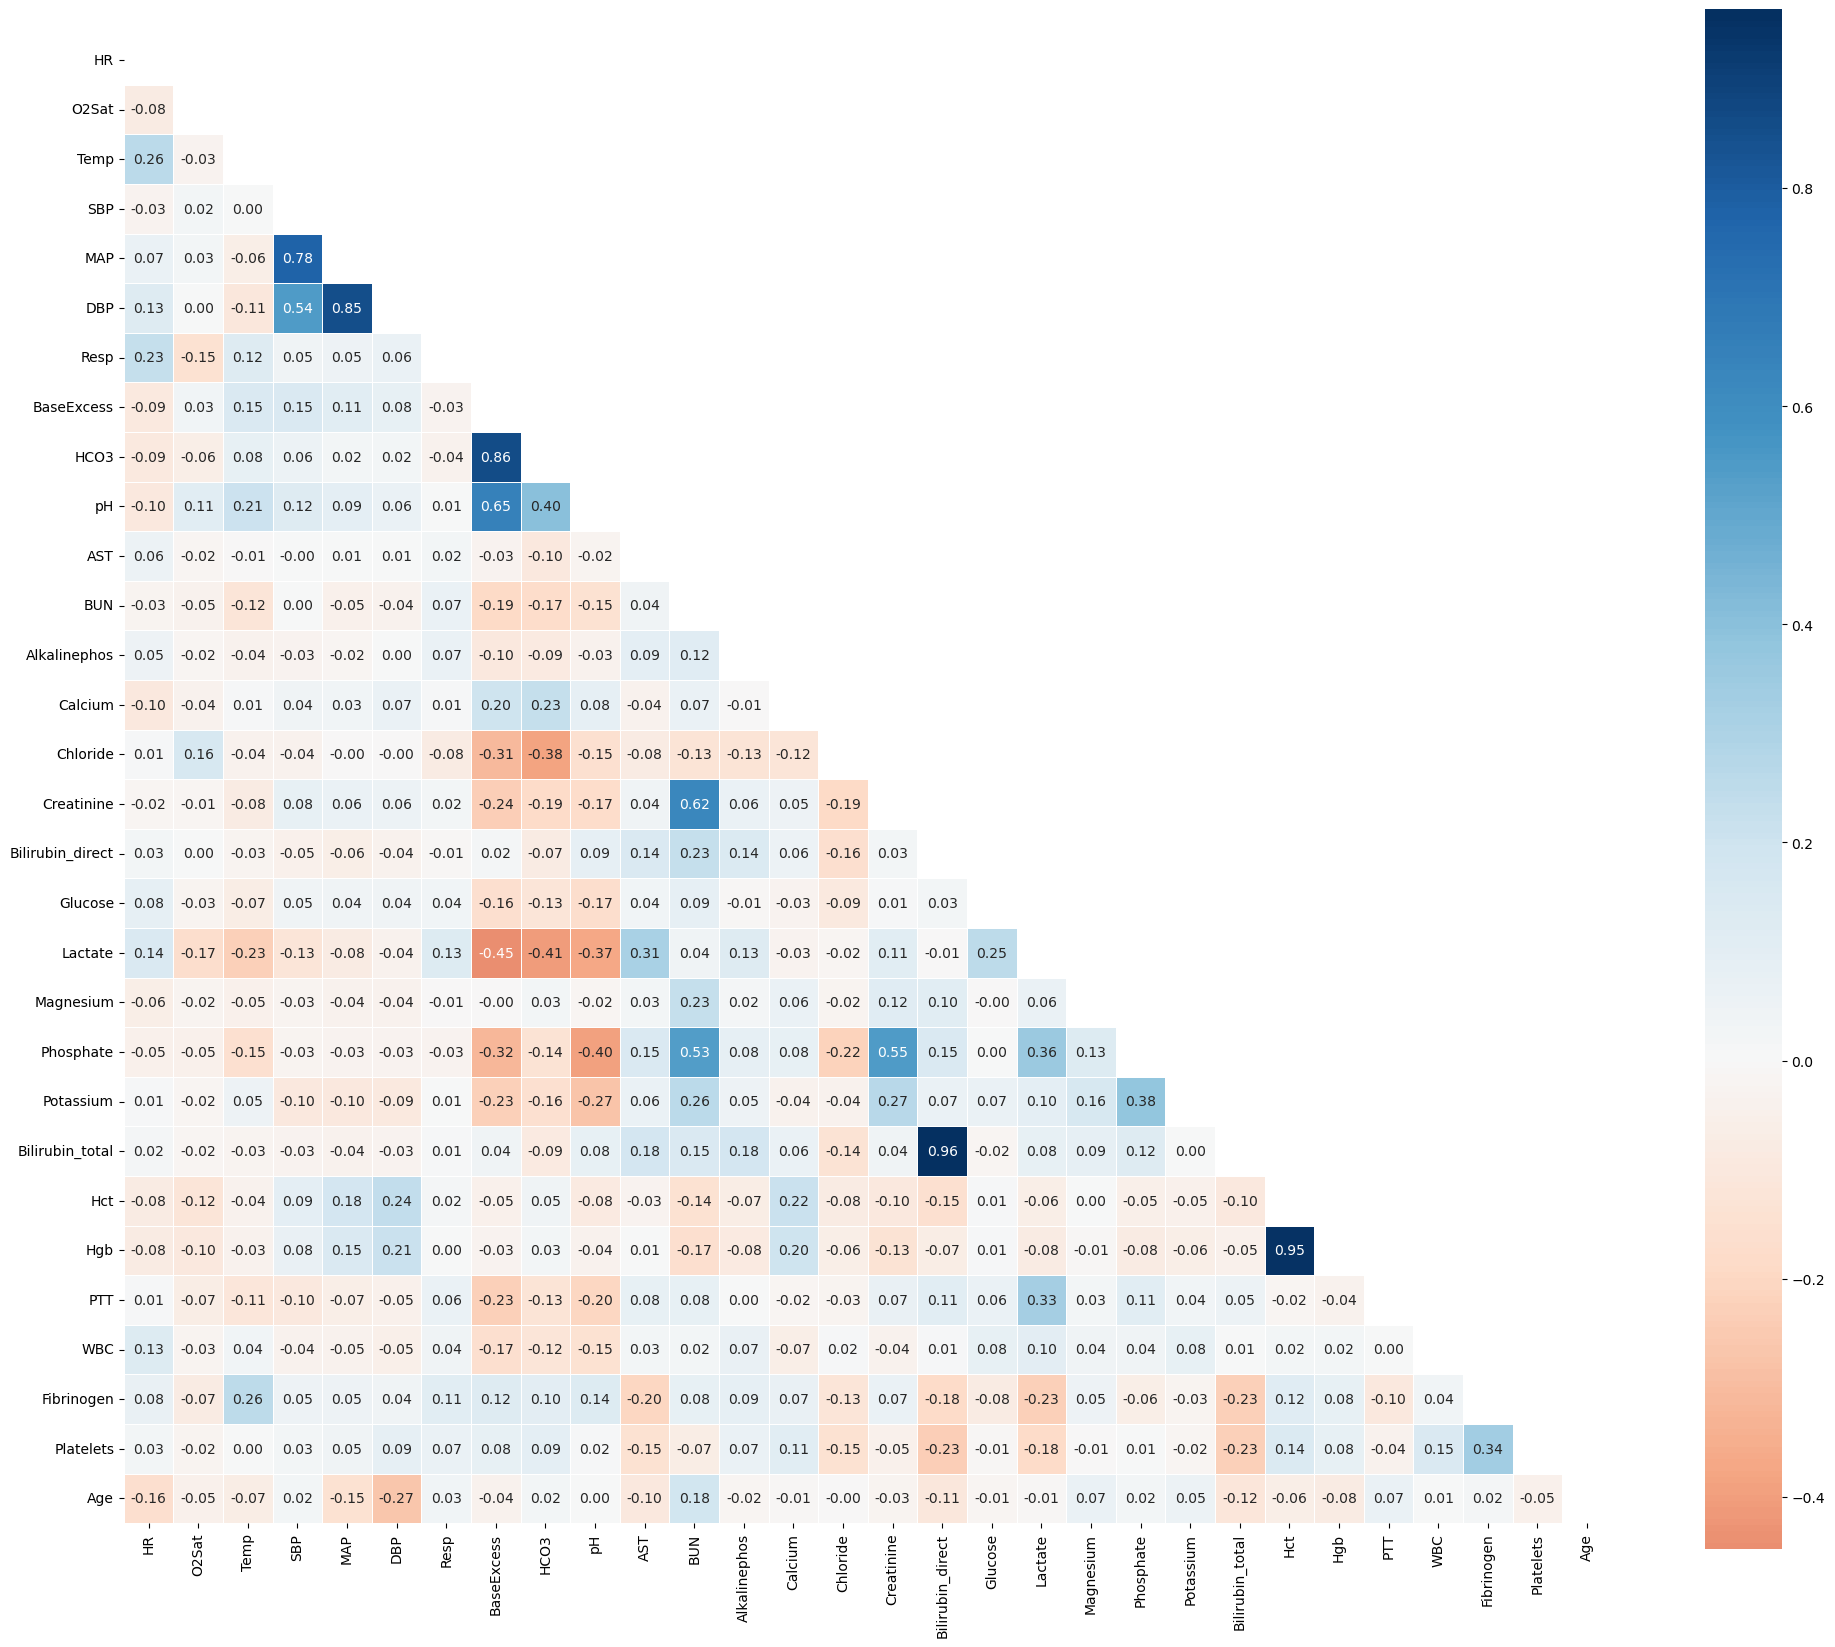

In [9]:
import seaborn as sns
correlation_feature=["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]
mat_corr = df[correlation_feature].corr()
mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,20))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [10]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Bilirubin_direct','Hct','Unit1','Unit2'}
df.drop(columns=columns_drop, inplace=True)
df.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,NaN,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [11]:
df.fillna(0,inplace=True)

In [12]:
df.head(100)

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,1,0,17072,0.0
1,1,65.0,100.0,0.0,72.00,16.5,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,2,0,17072,0.0
2,2,78.0,100.0,0.0,42.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,3,0,17072,0.0
3,3,73.0,100.0,0.0,0.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,4,0,17072,0.0
4,4,70.0,100.0,0.0,74.00,14.0,0.4,0.0,0.0,0.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,1,0,9891,1.0
96,1,119.0,98.0,0.0,87.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,2,0,9891,1.0
97,2,120.0,97.0,0.0,95.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,3,0,9891,1.0
98,3,116.0,97.0,36.0,84.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,4,0,9891,1.0


In [13]:
# Identified duplicates in the dataset
duplicate_vales=df[df.duplicated(keep=False)]

In [14]:
df.head(100)

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,1,0,17072,0.0
1,1,65.0,100.0,0.0,72.00,16.5,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,2,0,17072,0.0
2,2,78.0,100.0,0.0,42.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,3,0,17072,0.0
3,3,73.0,100.0,0.0,0.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,4,0,17072,0.0
4,4,70.0,100.0,0.0,74.00,14.0,0.4,0.0,0.0,0.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,1,0,9891,1.0
96,1,119.0,98.0,0.0,87.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,2,0,9891,1.0
97,2,120.0,97.0,0.0,95.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,3,0,9891,1.0
98,3,116.0,97.0,36.0,84.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,4,0,9891,1.0


In [15]:
# Determining Heart rate in the range of 10 and 200
target_HR = df[(df['HR'] >= 200) & (df['HR'] <= 10 )]

In [16]:
target_HR.shape

(0, 27)

In [17]:
# Determining Temperature in the range of 20 and 40
target_dataSepsis = df[(df['Temp'] >= 40) & (df['Temp'] <= 20 )]
target_dataSepsis.shape

(0, 27)

In [18]:
# Group the data by patient ID and calculate mean, min, max, and std for each column
grouped_data = df.groupby(['Patient_ID']).agg({'Hour': 'mean',
                                                       'HR': ['mean', 'min', 'max', 'std'],
                                                       'O2Sat': ['mean', 'min', 'max', 'std'],
                                                       'Temp': ['mean', 'min', 'max', 'std'],
                                                       'MAP': ['mean', 'min', 'max', 'std'],
                                                       'Resp': ['mean', 'min', 'max', 'std'],
                                                       'PaCO2': ['mean', 'min', 'max', 'std'],
                                                        'FiO2': ['mean', 'min', 'max', 'std'],
                                                       'SaO2': ['mean', 'min', 'max', 'std'],
                                                       'AST': ['mean', 'min', 'max', 'std'],
                                                        'BUN': ['mean', 'min', 'max', 'std'],
                                                       'Creatinine': ['mean', 'min', 'max', 'std'],
                                                       'Glucose': ['mean', 'min', 'max', 'std'],
                                                       'Hgb': ['mean', 'min', 'max', 'std'],
                                                       'WBC': ['mean', 'min', 'max', 'std'],
                                                       'Platelets': ['mean', 'min', 'max', 'std'],
                                                       'Bilirubin_total': ['mean', 'min', 'max', 'std'],
                                                        'Age': 'mean',
                                                       'Gender': 'first',
                                                       'HospAdmTime': 'first',
                                                       'ICULOS': 'max',
                                                       'SepsisLabel': 'max',
                                                       'Unit': 'first'})
# Explanation: In this line, you are using the "groupby" function to group our data by the "Patient_ID"
# column. Then, the "agg" function is used to apply various aggregation functions to each group. we are
# calculating the mean, minimum, maximum, and standard deviation for multiple columns in our dataset,
# such as heart rate (HR), oxygen saturation (O2Sat), temperature (Temp), and many others.

# Flatten the column names of the resulting DataFrame
grouped_data.columns = ["_".join(x) for x in grouped_data.columns.ravel()]
# Explanation: In this line, we are updating the column names of the "grouped_data" DataFrame. we are
# using a list comprehension to join the multi-level column names (which were created by the aggregation)
# into a single string format with underscores, making the column names more concise and easier to work with.

# Reset the index to have 'Patient_ID' as a separate column
grouped_data = grouped_data.reset_index()
# Explanation: In this line, we are resetting the index of the "grouped_data" DataFrame, which will
# convert the "Patient_ID" back into a regular column. This change is often made to prepare the data for
# export or further analysis.

In [19]:
output_file_path = r'.cleanData.csv'
grouped_data.to_csv(output_file_path, index=False)